In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data= pd.read_csv("airline.csv")

In [5]:
data.head(5)

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,Nov-23,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,Nov-23,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,Nov-23,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,Dec-22,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,Nov-23,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [6]:
data=data.drop(columns=['Unnamed: 0','Name'],axis=1)

In [7]:
data.shape

(3701, 18)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OverallRating          3696 non-null   float64
 1   ReviewHeader           3701 non-null   object 
 2   Datetime               3701 non-null   object 
 3   VerifiedReview         3701 non-null   bool   
 4   ReviewBody             3701 non-null   object 
 5   TypeOfTraveller        2930 non-null   object 
 6   SeatType               3699 non-null   object 
 7   Route                  2926 non-null   object 
 8   DateFlown              2923 non-null   object 
 9   SeatComfort            3585 non-null   float64
 10  CabinStaffService      3574 non-null   float64
 11  GroundService          2855 non-null   float64
 12  ValueForMoney          3700 non-null   float64
 13  Recommended            3701 non-null   object 
 14  Aircraft               1922 non-null   object 
 15  Food

In [9]:
data.isnull().sum()

OverallRating               5
ReviewHeader                0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort               116
CabinStaffService         127
GroundService             846
ValueForMoney               1
Recommended                 0
Aircraft                 1779
Food&Beverages            386
InflightEntertainment    1150
Wifi&Connectivity        3092
dtype: int64

In [11]:
data.describe()

,OverallRating,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Food&Beverages,InflightEntertainment,Wifi&Connectivity
count,3696.000000,3585.000000,3574.000000,2855.000000,3700.000000,3315.000000,2551.000000,609.000000
mean,4.734307,2.875314,3.254057,2.784238,2.688378,2.713122,2.646021,1.924466
std,3.175306,1.362081,1.489709,1.457058,1.471887,1.437092,1.398509,1.352705
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
75%,8.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [12]:
data.describe(include='O')

,ReviewHeader,Datetime,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,Recommended,Aircraft
count,3701,3701,3701,2930,3699,2926,2923,3701,1922
unique,2684,1820,3692,4,4,1590,112,2,202
top,British Airways customer review,19th January 2015,LHR-SFO. I paid premium economy but upgrade wi...,Couple Leisure,Economy Class,London to Johannesburg,Aug-15,no,A320
freq,956,26,2,1000,1927,17,83,2203,366


<Axes: ylabel='OverallRating'>

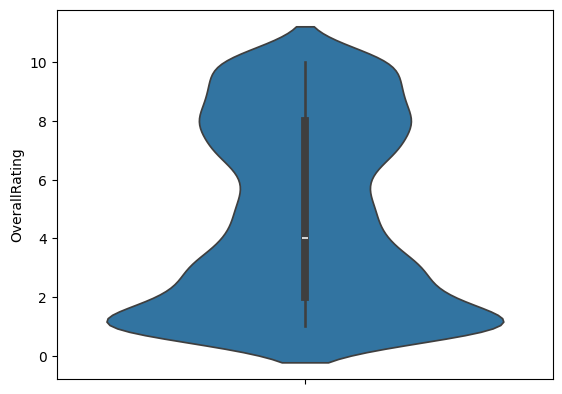

In [13]:
sns.violinplot(y='OverallRating',data=data)

<Axes: xlabel='SeatType', ylabel='count'>

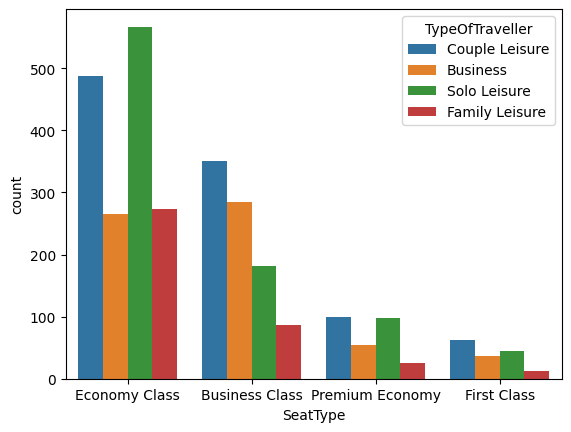

In [15]:
sns.countplot(x='SeatType',hue='TypeOfTraveller',data=data)

Text(0.5, 1.0, 'Count of Overall Ratings for Business ')

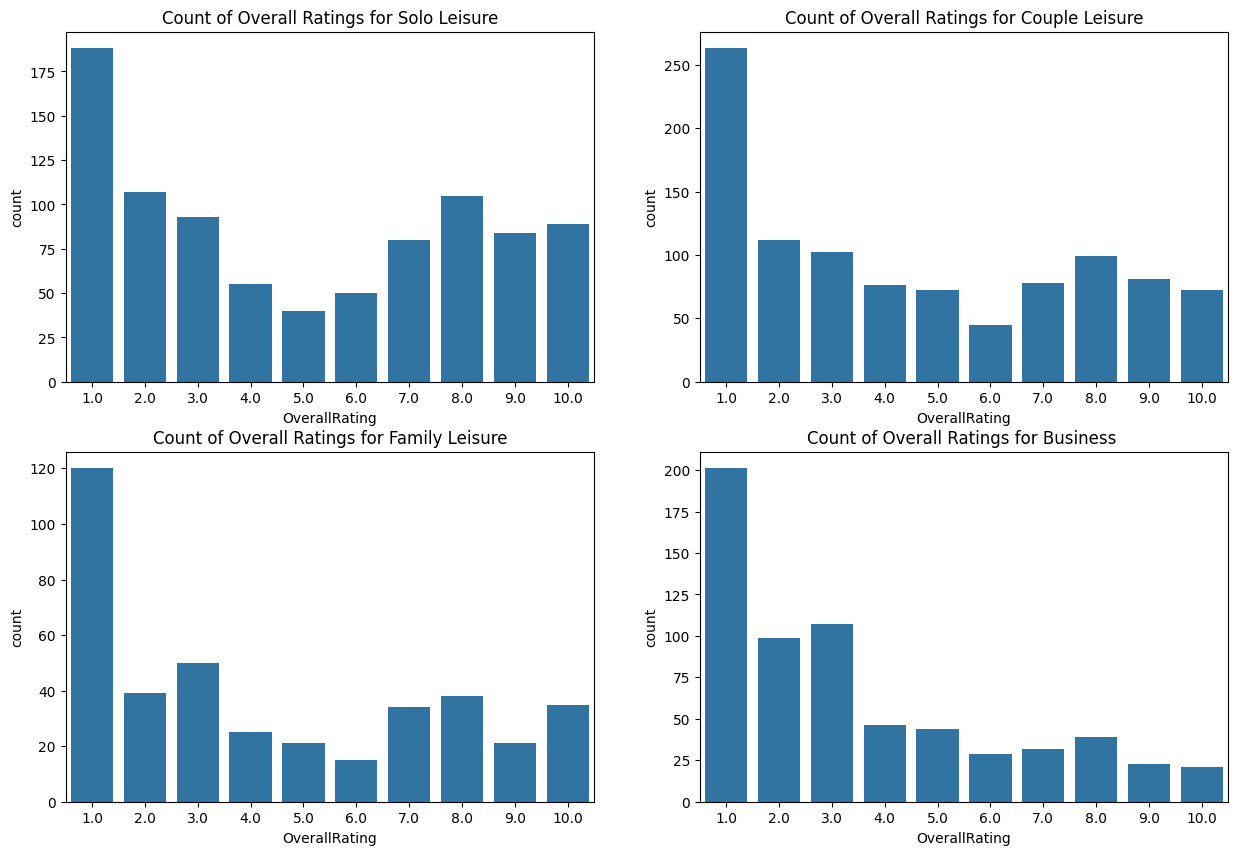

In [14]:
plt.figure(figsize=(15, 10))
plt.subplot2grid((2, 2), (0, 0))
solo_leisure_data = data[data['TypeOfTraveller'] == 'Solo Leisure']
sns.countplot(x='OverallRating', data=solo_leisure_data)
plt.title('Count of Overall Ratings for Solo Leisure')

plt.subplot2grid((2, 2), (0, 1))
Couple_leisure_data = data[data['TypeOfTraveller'] == 'Couple Leisure']
sns.countplot(x='OverallRating', data=Couple_leisure_data)
plt.title('Count of Overall Ratings for Couple Leisure')
plt.subplot2grid((2, 2), (1, 0))
Family_leisure_data = data[data['TypeOfTraveller'] == 'Family Leisure']
sns.countplot(x='OverallRating', data=Family_leisure_data)
plt.title('Count of Overall Ratings for Family Leisure')

plt.subplot2grid((2, 2), (1, 1))
Business_leisure_data = data[data['TypeOfTraveller'] == 'Business']
sns.countplot(x='OverallRating', data=Business_leisure_data)
plt.title('Count of Overall Ratings for Business ')

In [17]:

data['SeatType'].value_counts()

Economy Class      1927
Business Class     1198
Premium Economy     361
First Class         213
Name: SeatType, dtype: int64

Text(0.5, 1.0, 'Count of Overall Ratings for Business Class')

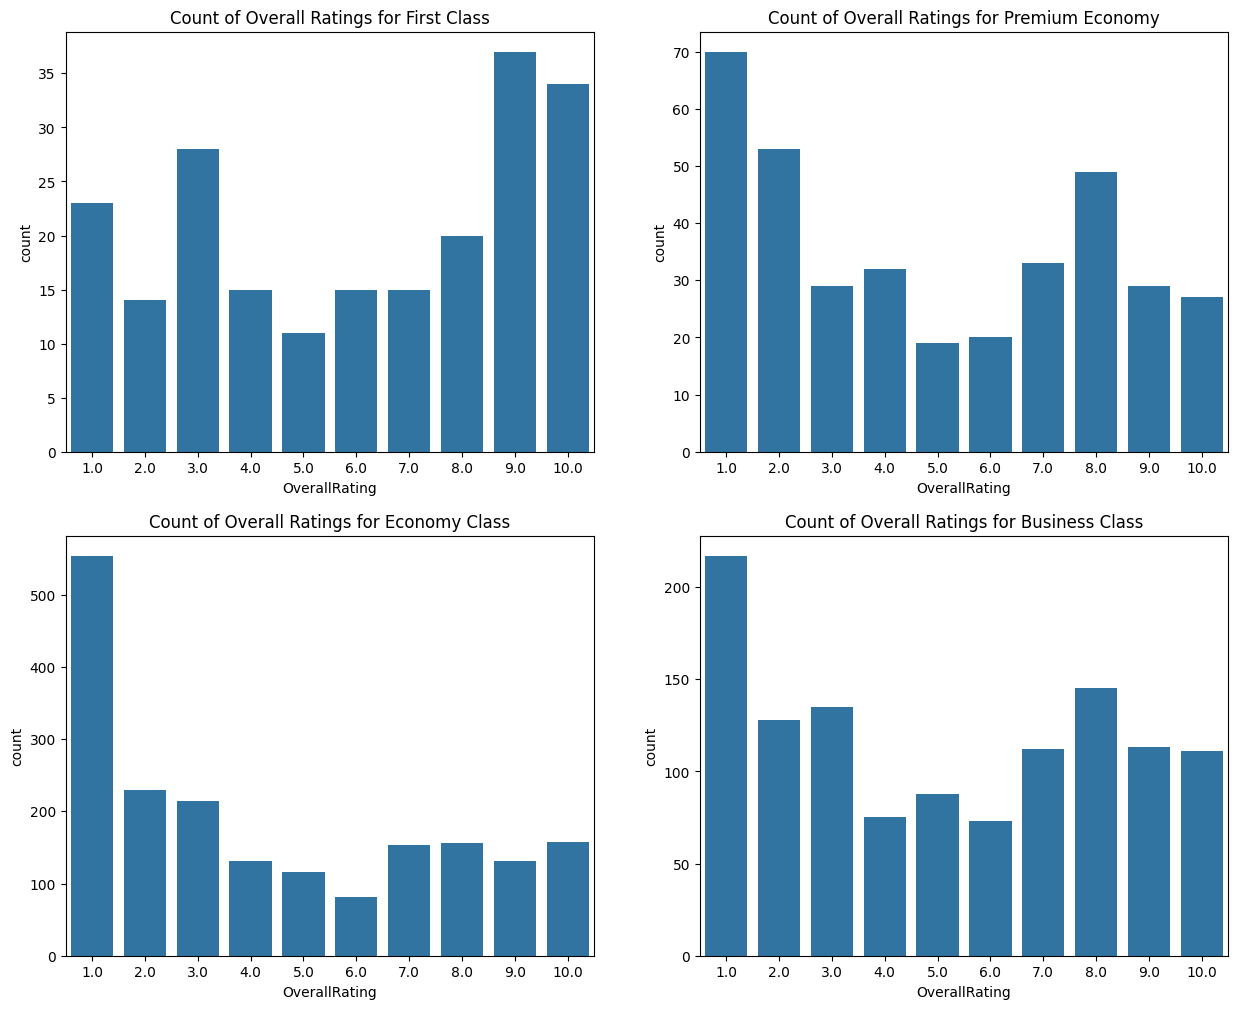

In [18]:
plt.figure(figsize=(15, 12))

plt.subplot2grid((2,2),(0,0))
total=data.loc[(data['SeatType']=='First Class')&(data['OverallRating'])]
sns.countplot(x='OverallRating',data=total)
plt.title('Count of Overall Ratings for First Class')


plt.subplot2grid((2,2),(0,1))
total=data.loc[(data['SeatType']=='Premium Economy')&(data['OverallRating'])]
sns.countplot(x='OverallRating',data=total)
plt.title('Count of Overall Ratings for Premium Economy')


plt.subplot2grid((2,2),(1,0))
total=data.loc[(data['SeatType']=='Economy Class')&(data['OverallRating'])]
sns.countplot(x='OverallRating',data=total)
plt.title('Count of Overall Ratings for Economy Class')


plt.subplot2grid((2,2),(1,1))
total=data.loc[(data['SeatType']=='Business Class')&(data['OverallRating'])]
sns.countplot(x='OverallRating',data=total)
plt.title('Count of Overall Ratings for Business Class')

Text(0.5, 1.0, 'rating of seat comfort')

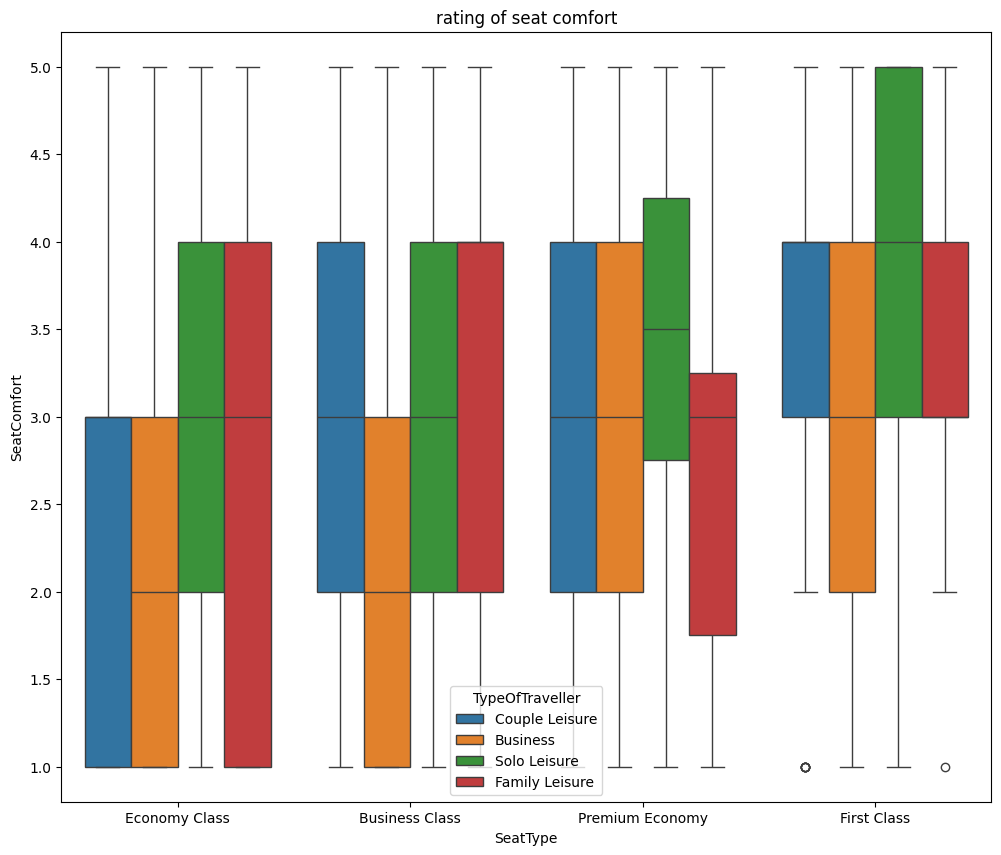

In [19]:
plt.figure(figsize=(12,10))
sns.boxplot(x='SeatType',y='SeatComfort',hue='TypeOfTraveller',data=data).set_title('rating of seat comfort')

staffService :                  CabinStaffService
SeatType                          
First Class               3.938679
Business Class            3.462852
Premium Economy           3.119318
Economy Class             3.068046
staffService :                  GroundService
SeatType                      
First Class           3.160256
Business Class        2.931818
Premium Economy       2.904059
Economy Class         2.642534


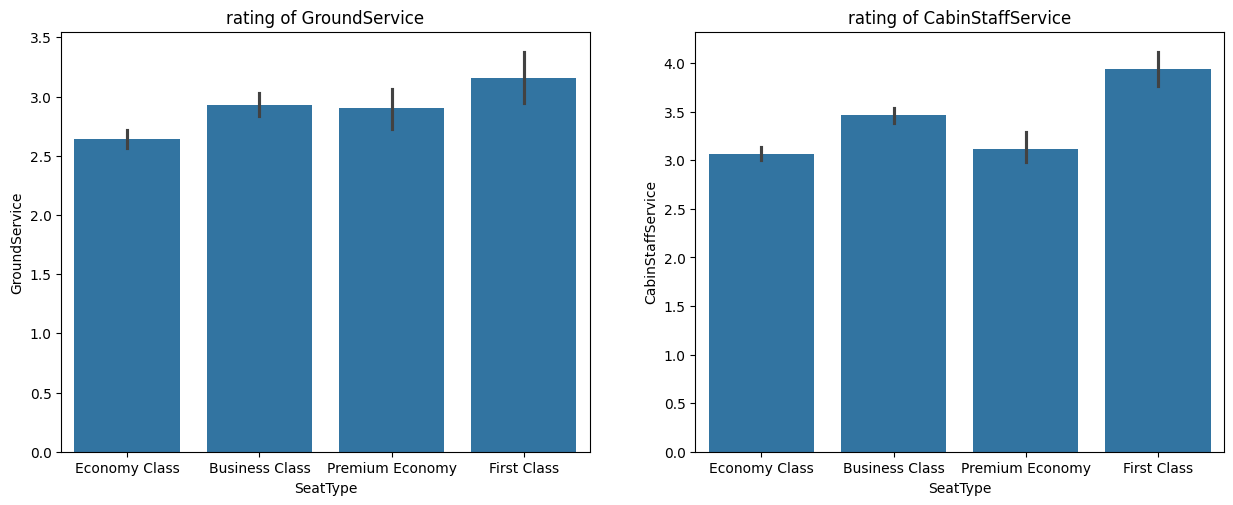

In [20]:
plt.figure(figsize=(15, 12))

plt.subplot2grid((2,2),(0,0))
sns.barplot(x='SeatType',y='GroundService',data=data).set_title('rating of GroundService')

plt.subplot2grid((2,2),(0,1))
sns.barplot(x='SeatType',y='CabinStaffService',data=data).set_title('rating of CabinStaffService')

staffService=data[['SeatType','CabinStaffService']].groupby(['SeatType'],as_index=True).mean().sort_values(by='CabinStaffService',ascending=False)
GroundService=data[['SeatType','GroundService']].groupby(['SeatType'],as_index=True).mean().sort_values(by='GroundService',ascending=False)
print(f'staffService : {staffService}')
print(f'staffService : {GroundService}')

<Axes: xlabel='Food&Beverages', ylabel='count'>

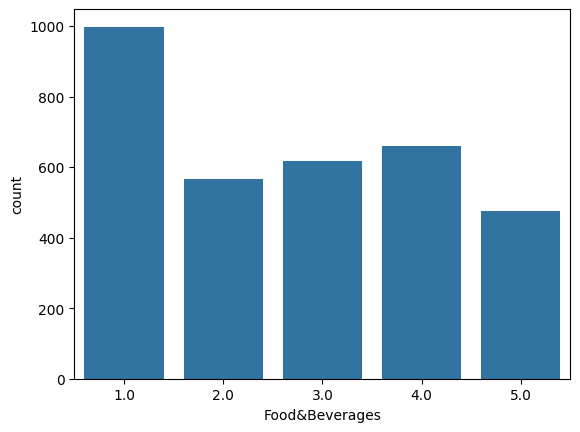

In [21]:
sns.countplot(x='Food&Beverages',data=data)

<Axes: xlabel='SeatType', ylabel='Food&Beverages'>

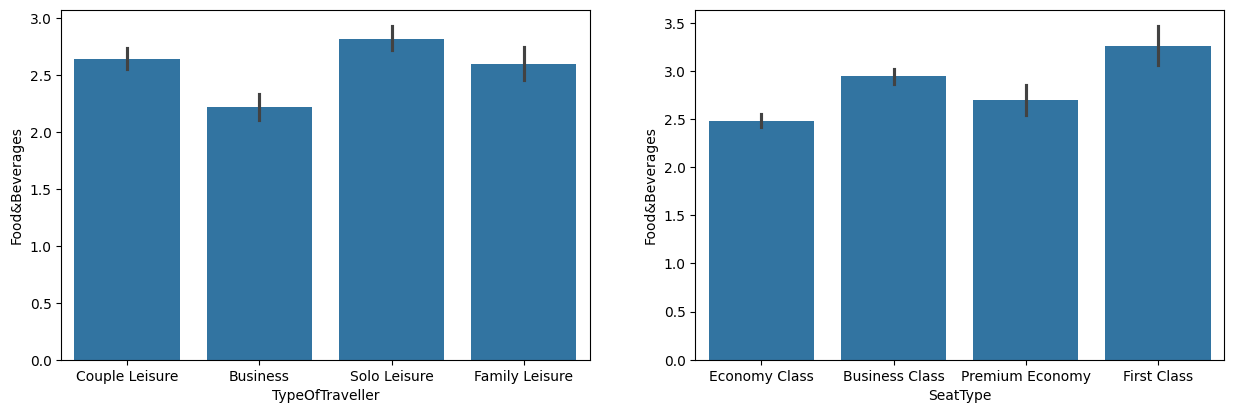

In [22]:
plt.figure(figsize=(15,10))
plt.subplot2grid((2,2),(0,0))
sns.barplot(x='TypeOfTraveller',y='Food&Beverages',data=data)

plt.subplot2grid((2,2),(0,1))
sns.barplot(x='SeatType',y='Food&Beverages',data=data)

<Axes: xlabel='SeatType', ylabel='Food&Beverages'>

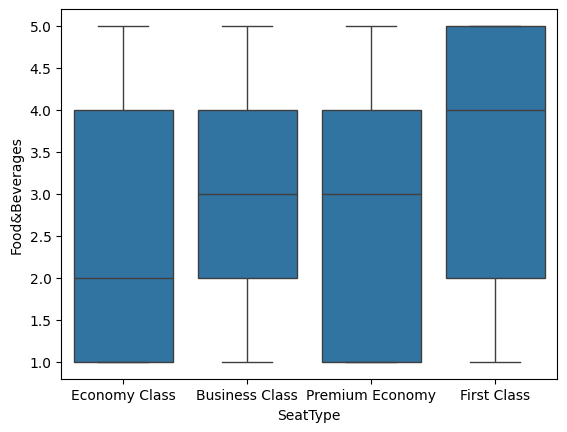

In [23]:
sns.boxplot(x='SeatType',y='Food&Beverages',data=data)

<Axes: xlabel='SeatType', ylabel='Food&Beverages'>

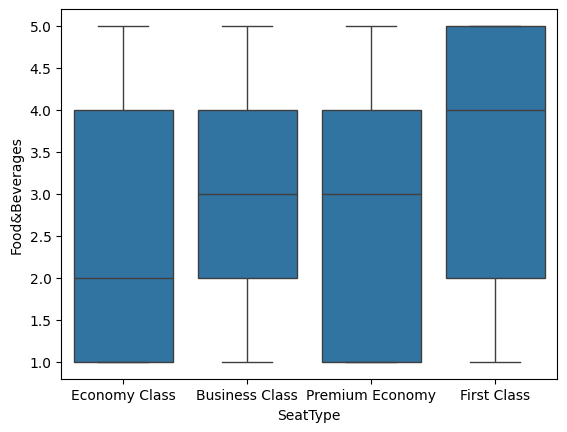

In [24]:
sns.boxplot(x='SeatType',y='Food&Beverages',data=data)

In [25]:
data[['Recommended','OverallRating']].groupby(['Recommended'],as_index=True).count().sort_values(by='OverallRating',ascending=False)

,OverallRating
Recommended,
no,2198
yes,1498


In [26]:
da_yes=data[data['Recommended']=='yes']
da_no=data[data['Recommended']=='no']
da_yes['SeatType'].value_counts()

Economy Class      697
Business Class     549
Premium Economy    147
First Class        105
Name: SeatType, dtype: int64

In [27]:
da_no['SeatType'].value_counts()

Economy Class      1230
Business Class      649
Premium Economy     214
First Class         108
Name: SeatType, dtype: int64

Text(0.5, 1.0, 'not recomend')

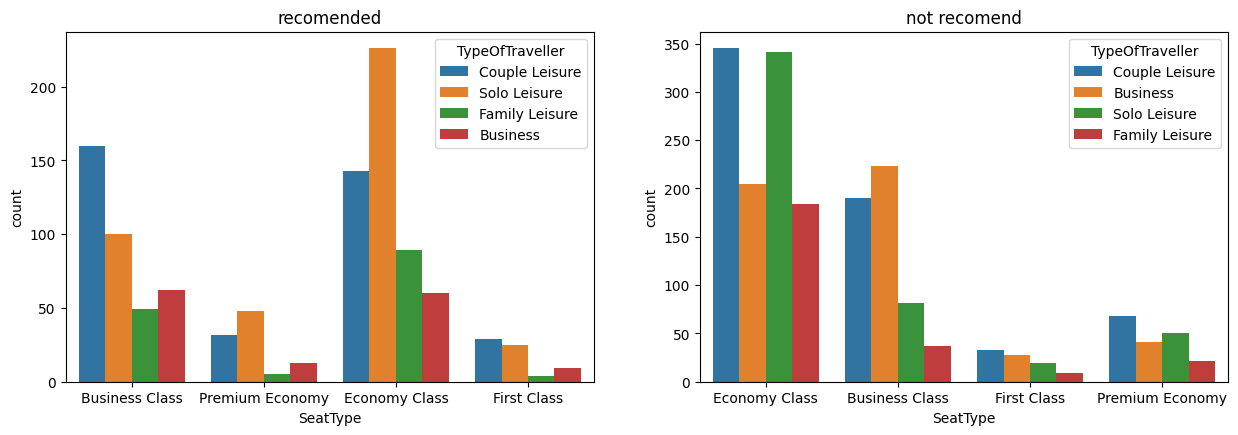

In [28]:
plt.figure(figsize=(15,10))
plt.subplot2grid((2,2),(0,0))
sns.countplot(x='SeatType',hue='TypeOfTraveller',data=da_yes).set_title('recomended')

plt.subplot2grid((2,2),(0,1))
sns.countplot(x='SeatType',hue='TypeOfTraveller',data=da_no).set_title('not recomend')

In [29]:
date_format = "%d %B %Y"
data['Datetime'] = pd.to_datetime(data['Datetime'].str.replace(r'th|st|nd|rd', '', regex=True), format=date_format, errors='coerce')

In [30]:
data['month'] = (data['Datetime']).dt.month
data['year']=(data['Datetime']).dt.year

Text(0.5, 1.0, 'rating by year')

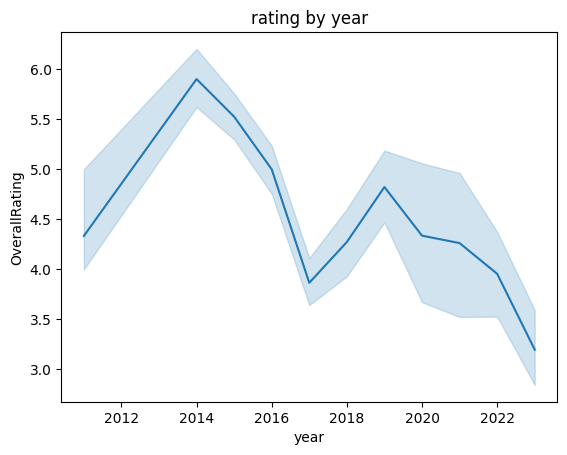

In [31]:
sns.lineplot(x='year',y='OverallRating',data=data).set_title('rating by year')

Text(0.5, 1.0, 'rating months of 2014')

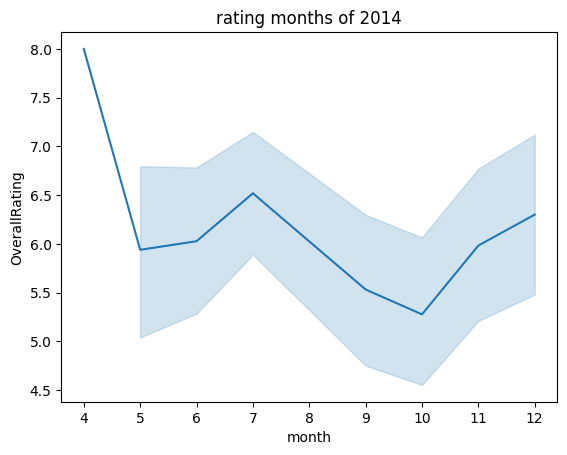

In [33]:
month_2014=data[data['year']==2014]
sns.lineplot(x='month',y='OverallRating',data=month_2014).set_title('rating months of 2014')

In [34]:
date_format = "%B %Y"
data['DateFlown'] = pd.to_datetime(data['DateFlown'].str.replace(r'th|st|nd|rd', '', regex=True), format=date_format, errors='coerce')

In [35]:
data['month_flown'] = (data['DateFlown']).dt.month
data['year_flown']=(data['DateFlown']).dt.year

In [36]:
data=data.drop(columns=['Datetime','DateFlown'],axis=1)

Text(0.5, 1.0, 'rating by year')

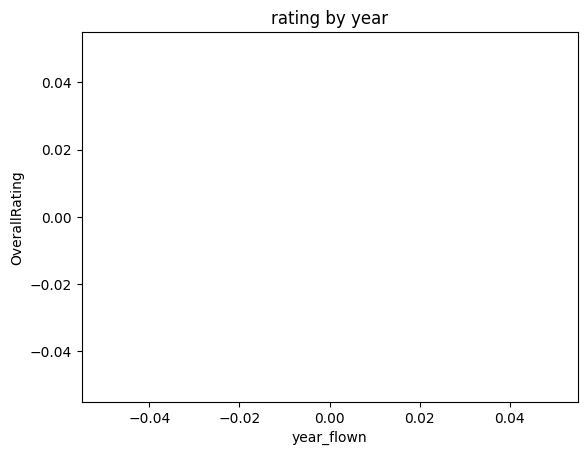

In [37]:
sns.lineplot(x='year_flown',y='OverallRating',data=data).set_title('rating by year')

Text(0.5, 1.0, 'rating months of 2014')

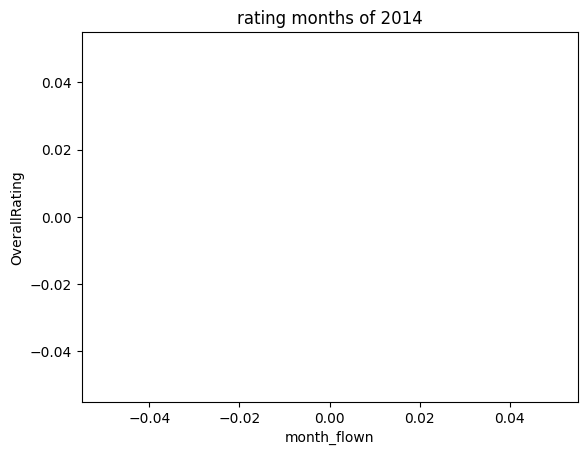

In [38]:
month_2014=data[data['year_flown']==2014]
sns.lineplot(x='month_flown',y='OverallRating',data=month_2014).set_title('rating months of 2014')

In [39]:
data['Aircraft'].value_counts()

A320                     366
Boeing 777               272
Boeing 747-400           182
A380                     166
Boeing 777-200           125
                        ... 
A319 / Boeing 787-9        1
Boeing 747-400 / A319      1
A320 / Boeing 747-400      1
Boeing 777 / A380          1
Airbus 319                 1
Name: Aircraft, Length: 202, dtype: int64

In [40]:
data['Aircraft'].isnull().sum()

1779

In [41]:
data['Aircraft'].nunique()

202

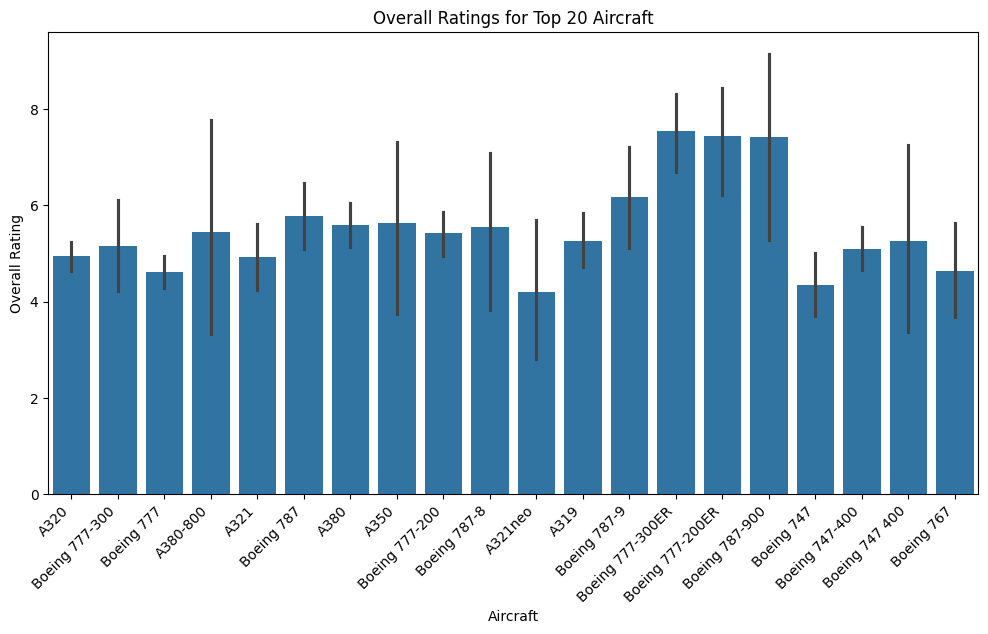

In [42]:
aircraft_column = data["Aircraft"]
overall_rating_column = data["OverallRating"]

top_20_aircraft = aircraft_column.value_counts().head(20).index

filtered_data = data[data["Aircraft"].isin(top_20_aircraft)]

plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_data['Aircraft'],y=filtered_data['OverallRating'])
plt.title('Overall Ratings for Top 20 Aircraft')
plt.xlabel('Aircraft')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45, ha='right');

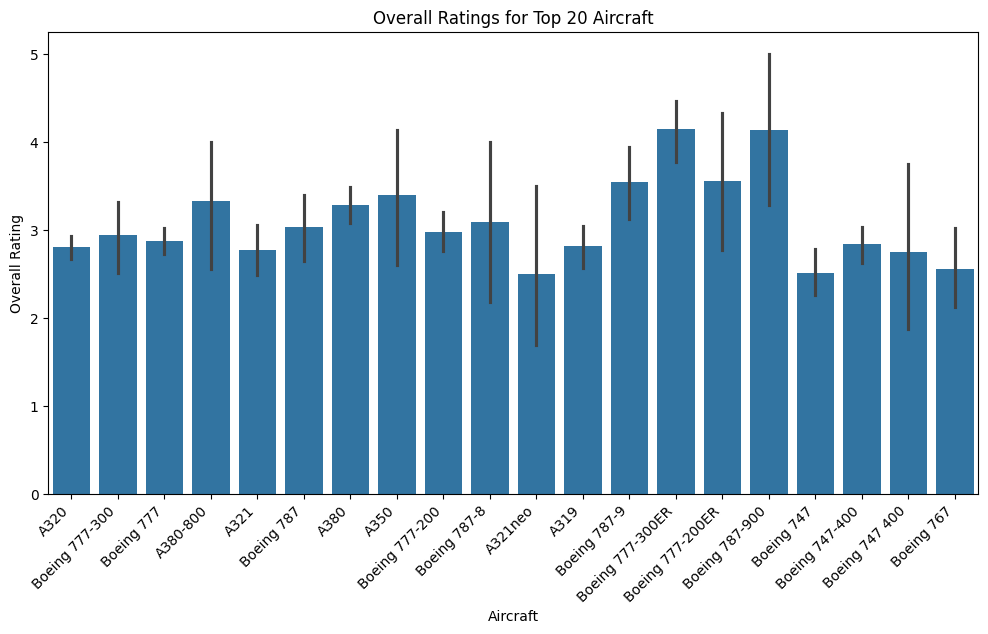

In [43]:
aircraft_column = data["Aircraft"]
overall_rating_column = data["OverallRating"]

top_20_aircraft = aircraft_column.value_counts().head(20).index

filtered_data = data[data["Aircraft"].isin(top_20_aircraft)]

plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_data['Aircraft'],y=filtered_data['SeatComfort'])
plt.title('Overall Ratings for Top 20 Aircraft')
plt.xlabel('Aircraft')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45, ha='right');